In [2]:
import rtde_control
import rtde_receive
import pyrealsense2 as rs
import numpy as np
import sys
import yaml
from matplotlib import pyplot as plt
import time

sys.path.append("../..")
from notebooks.UltrasoundNavigation.force_control import *

# from SurfaceContact.move import move_default_pose
# from SurfaceContact.control import SurfaceContactControl

%load_ext autoreload
%autoreload 2

In [2]:
with open('../../config/pose_in_TCP_frame.yaml','r') as f:
    poses = yaml.safe_load(f)

    camera_2_tcp = poses['camera']
    probe_2_tcp = poses['probe']

# Connect to robot

In [10]:
# from recording_upload_server import CaptureServer
rtde_c = rtde_control.RTDEControlInterface("192.168.1.2")
rtde_r = rtde_receive.RTDEReceiveInterface("192.168.1.2")

In [5]:
rtde_c.setTcp(probe_2_tcp)

True

In [21]:
# disconnect
rtde_c.disconnect()
rtde_r.disconnect()

In [16]:
start_pose = rtde_r.getActualTCPPose()
start_pose

[0.10456998187033242,
 -0.5460145084569419,
 0.17672904747386925,
 -1.7937306377910271,
 1.8853985729963971,
 0.6074340946151292]

RTDEControlInterface: Could not receive data from robot...
RTDEControlInterface Exception: RTDEReceiveInterface Exception: Operation canceled
RTDEControlInterface: Robot is disconnected, reconnecting...
Operation canceled


Reconnecting...
Dashboard client deadline expired


RTDEControlInterface Exception: Timeout connecting to UR dashboard server.


In [7]:
rtde_c.moveL(start_pose, speed = 0.005)

True

In [12]:
rtde_c.zeroFtSensor()
w0 = get_average_force(rtde_r, [0, 0, 0, 0, 0, 0])
rotate_y_until_prependicular(rtde_r, rtde_c, w0)

Ave force [-0.05898861  0.50991263  0.11093163 -0.00811383 -0.00309541 -0.0056204 ]


Current force is:4.972372508504451:  Time elapsed=00:08   


Target force reached.
Ave force [ 4.40457543e-02 -2.31140595e+00  5.12857246e+00 -1.21401396e-01
  1.38970084e-02  4.91921363e-03]


Current force is:7.848759679295944:  Time elapsed=00:01 


Target force reached.
Ave force [-4.43857018e-02 -3.67277088e+00  7.94483482e+00 -2.14255536e-01
  1.57262680e-02  3.98448555e-03]
torque diff: -0.09285413923360909
rotate -23.35624177008273


Current force is:4.760124239324009:  Time elapsed=00:06   


Target force reached.
Ave force [ 0.26190066 -4.93627136  4.79195913 -0.18686059 -0.05104842  0.0893345 ]


Current force is:7.606321389915578:  Time elapsed=00:01


Target force reached.
Ave force [ 0.20666423 -7.42537347  7.98534305 -0.23478472 -0.08045073  0.13558246]
torque diff: -0.04792412804465851
rotate -9.877238413397553


Current force is:5.101708531771159:  Time elapsed=00:01


Target force reached.
Ave force [-0.23310066 -5.2190279   5.18398158 -0.13071576  0.03720059 -0.115373  ]


Current force is:8.371607583428773:  Time elapsed=00:01


Target force reached.
Ave force [ 2.97999596e-01 -8.39172699e+00  8.34177586e+00 -1.59808246e-01
  7.43806391e-03 -6.58886415e-02]
torque diff: -0.029092488906110214
rotate -4.2277466718330645


Current force is:5.118343308393257:  Time elapsed=00:00


Target force reached.
Ave force [-0.18796998 -5.28360777  5.23388418 -0.09505967  0.07719747 -0.15063103]


Current force is:8.052149131442542:  Time elapsed=00:01


Target force reached.
Ave force [-0.27143655 -7.66535408  7.79392596 -0.10825349  0.04808361 -0.13233631]
torque diff: -0.013193824682293617


Current force is:4.781625361297997:  Time elapsed=00:01

Target force reached.
find prependicular pos


In [79]:
def linear_scan_following_surface():
    rotate_y_until_prependicular()
    move_x(rtde_c, rtde_r, 10, speed=0.01)
    rotate_y_until_prependicular()
linear_scan_following_surface()

Current force is:1.99605782090132:  Time elapsed=00:00

Current force is:4.554187814802276:  Time elapsed=00:01 


Target force reached.
Ave force [ 0.90454623  1.67925176  4.5683317   0.13834543 -0.0167736   0.13446761]


Current force is:8.050027479431048:  Time elapsed=00:01


Target force reached.
Ave force [ 1.03303571  0.54000051  7.98164426  0.10160854 -0.01343981  0.11502704]
torque diff: -0.0367368911494938
rotate -3.0


Current force is:5.420613829729584:  Time elapsed=00:00


Target force reached.
Ave force [0.91780053 0.48390013 5.65329099 0.10697245 0.00866484 0.13154324]


Current force is:8.004446080944582:  Time elapsed=00:04


Target force reached.
Ave force [ 1.09023702e+00 -3.89535003e-01  8.59432852e+00  7.93742414e-02
  2.60527996e-03  1.30287454e-01]
torque diff: -0.02759821000815456
rotate -3.0


Current force is:5.124694116118389:  Time elapsed=00:00


Target force reached.
Ave force [1.03170273 0.48115565 5.10052367 0.10857178 0.00819042 0.12463831]


Current force is:8.474393303534905:  Time elapsed=00:01 


Target force reached.
Ave force [ 1.06796148e+00 -5.37135337e-01  8.40364170e+00  8.84117947e-02
 -2.45371631e-03  1.12476109e-01]
torque diff: -0.020159985019444215
rotate -3.0


Current force is:4.714969952580222:  Time elapsed=00:03


Target force reached.
Ave force [8.02237672e-01 9.54684433e-01 4.57985799e+00 9.44079206e-02
 1.44767420e-03 1.16505902e-01]


Current force is:7.726522543714147:  Time elapsed=00:01


Target force reached.
Ave force [ 7.70473800e-01 -4.38529318e-01  7.89701079e+00  9.15887023e-02
  1.51663006e-04  1.10711494e-01]
torque diff: -0.0028192183031078982


Current force is:4.508009148577507:  Time elapsed=00:01


Target force reached.
find prependicular pos


Current force is:4.676933582006801:  Time elapsed=00:02 


Target force reached.
Ave force [ 1.12148977  2.16390825  4.87742099  0.2948951  -0.03556504  0.1244381 ]


Current force is:7.9296181853806775:  Time elapsed=00:03


Target force reached.
Ave force [ 0.97805386  0.54190538  8.05778256  0.2331356  -0.03775886  0.11145552]
torque diff: -0.061759507600116365
rotate -3.0


Current force is:4.714215175501068:  Time elapsed=00:00


Target force reached.
Ave force [ 0.96514393  1.30833121  4.66445994  0.2401568  -0.02450129  0.09813254]


Current force is:7.919060332213741:  Time elapsed=00:01


Target force reached.
Ave force [ 7.87728317e-01 -7.36250166e-03  8.08779685e+00  2.17347872e-01
 -3.00803005e-02  9.32693163e-02]
torque diff: -0.02280892677585497
rotate -3.0


Current force is:4.586894747829508:  Time elapsed=00:00


Target force reached.
Ave force [ 1.05156085  1.12574009  4.63130956  0.23229576 -0.02086509  0.08754854]


Current force is:7.984041990835999:  Time elapsed=00:01


Target force reached.
Ave force [ 0.87846272 -0.57495695  7.79876208  0.22483125 -0.02471445  0.07779842]
torque diff: -0.007464504100606839


Current force is:4.6007981171176695:  Time elapsed=00:01

Target force reached.
find prependicular pos


In [75]:
rtde_c.zeroFtSensor()
rotate_y_until_prependicular()

Current force is:0.3887084448015442:  Time elapsed=00:00

Current force is:4.951238257488473:  Time elapsed=00:09  


Target force reached.
Ave force [ 0.66882345  0.40814883  5.05154702 -0.02900015 -0.0177958   0.01549227]


Current force is:7.793238310045162:  Time elapsed=00:01


Target force reached.
Ave force [ 0.72757084 -0.21336578  7.8850806  -0.05719343 -0.01710276  0.02393191]
torque diff: -0.028193281205212327
rotate -3.0


Current force is:4.59794628157747:  Time elapsed=00:01  


Target force reached.
Ave force [ 0.68859254 -0.25048601  4.61340807 -0.05982077  0.02181298  0.13772618]


Current force is:8.57052065348044:  Time elapsed=00:01 


Target force reached.
Ave force [ 7.95195547e-01 -7.89234723e-01  8.58255123e+00 -8.24012043e-02
  2.96560426e-03  1.34180821e-01]
torque diff: -0.022580431587162192
rotate -3.0


Current force is:5.4508032253924465:  Time elapsed=00:00


Target force reached.
Ave force [ 0.66567348 -0.42076404  5.35036192 -0.07427635  0.02409959  0.13721276]


Current force is:8.250312664769206:  Time elapsed=00:01


Target force reached.
Ave force [ 0.66112673 -0.89889094  8.28580147 -0.08296152  0.01808553  0.13980945]
torque diff: -0.008685172759618415


Current force is:5.425923673636296:  Time elapsed=00:01

Target force reached.
find prependicular pos


# Connect to ultrasound image stream

In [ ]:
ultrasoud_vid = cv2.VideoCapture('/dev/video8')
ret, frame = ultrasoud_vid.read()		
plt.imshow(frame)

# Connect to RealSense Camera stream

In [14]:
pipeline = rs.pipeline()
pipeline.start()

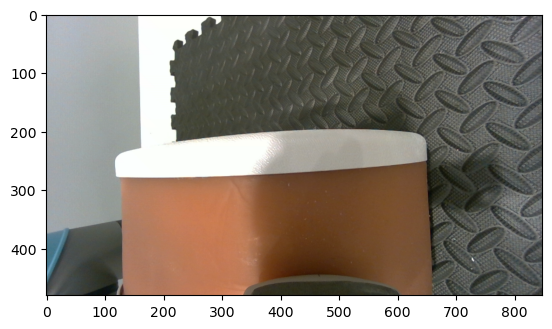

In [15]:
frames = pipeline.wait_for_frames()
color = frames.get_color_frame()
dep = np.asanyarray(color.get_data())
plt.figure()
plt.imshow(dep, cmap='gray')

In [9]:
move_default_pose(rtde_c)

In [13]:

body_color_rgb = (227,124,100)
body_hsv_rad = (5,50,100)
# rtde_c = rtde_r = []
sc = SurfaceContactControl(pipeline,rtde_c,rtde_r,
                           camera_2_tcp,probe_2_tcp,
                           body_color_rgb,body_hsv_rad)

In [24]:
sc.fetchCameraStreamData()
fig = plt.figure(dpi=100,figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sc.showScene([ax1,ax2])


NameError: name 'sc' is not defined

In [21]:
sc.mainloop()

0.002219508945596592

In [22]:
pipeline.stop()

# Useful Scripts

In [ ]:
# Script for saving default pose
with open('../config/default_pose.yaml','w') as f:
    yaml.safe_dump({'default_pose':rtde_r.getActualTCPPose()},f)